In [59]:
# Basic stuff we all need
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
data = pd.read_csv('../data/motor_vehicle_collisions_crashes.csv', low_memory=False)

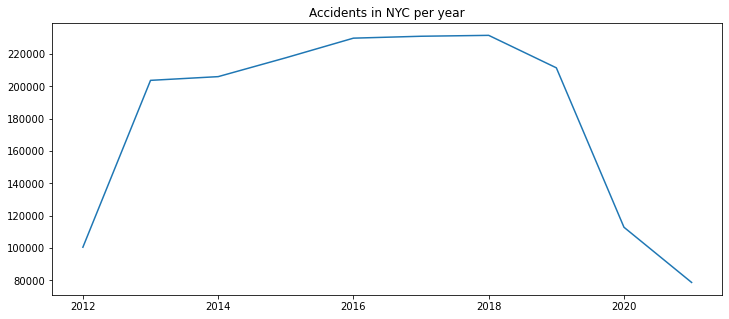

In [4]:
# Graph for accidents per year

yearly = pd.Series([ datetime.strptime(date, '%m/%d/%Y').year for date in data['CRASH DATE'] ]).value_counts().sort_index()
yearly_plot = yearly.plot(kind='line', title='Accidents in NYC per year', figsize=(12, 5))
yearly_plot.figure.savefig('img/Accidents_in_NYC_per_year.png', facecolor='white')

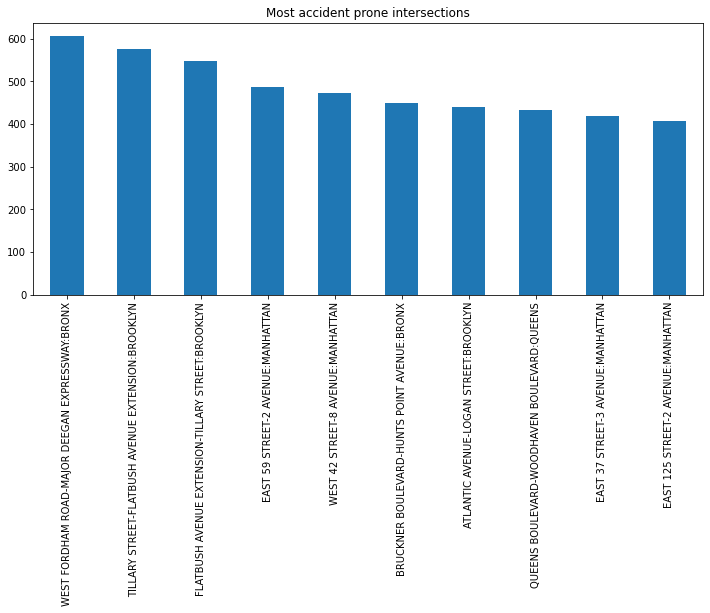

In [35]:
# Bar graph for top 10 accident prone intersections

intersections = data['ON STREET NAME'].str.strip() + '-' + data['CROSS STREET NAME'].str.strip() + ':'+data['BOROUGH'].str.strip()
intersections = intersections.dropna().value_counts().sort_values(ascending=False)[:10]
intersections_plot = intersections.plot(kind='bar', title='Most accident prone intersections', figsize=(12, 5))
intersections_plot.figure.savefig('img/Accident_prone_Intersections.png', facecolor='white')

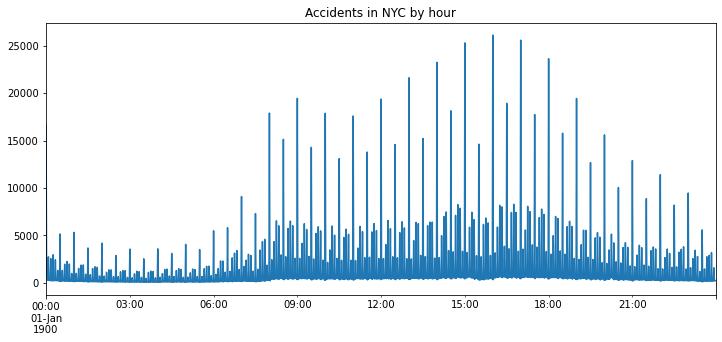

In [23]:
# Bar graph for accidents per hour

time_series = pd.Series([ datetime.strptime(time, '%H:%M') for time in data['CRASH TIME'] ]).value_counts().sort_index()
hourly_plot = time_series.plot(kind='line', title='Accidents in NYC by hour', figsize=(12, 5))
hourly_plot.figure.savefig('img/Accidents_in_NYC_per_hour.png', facecolor='white')

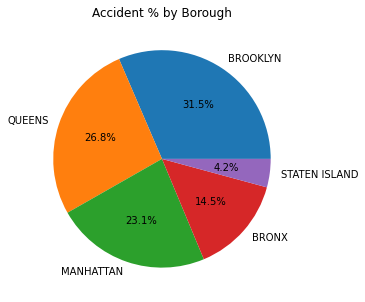

In [24]:
# Pie chart for accidents per borough

accidents_borough = data['BOROUGH'].value_counts()
pie = accidents_borough.plot.pie(title='Accident % by Borough', label='', autopct='%1.1f%%', figsize=(12, 5))
pie.figure.savefig('img/Accident % by Borough.png', facecolor='white')

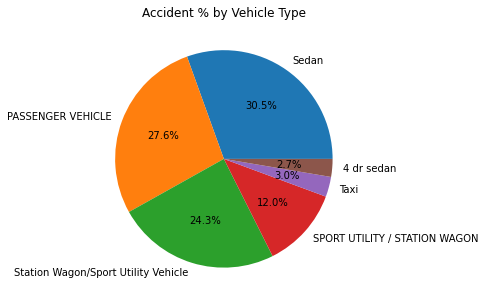

In [23]:
# Pie chart for accident contribution of different vehicle types

accidents_vehicle_type = data['VEHICLE TYPE CODE 1'].value_counts()
filtered = accidents_vehicle_type[accidents_vehicle_type >= 0.02*accidents_vehicle_type.sum()]
pie = filtered.plot.pie(title='Accident % by Vehicle Type', label='', autopct='%1.1f%%', figsize=(12, 5))
pie.figure.savefig('img/Accident % by Vehicle Type.png', facecolor='white')

In [70]:
injuries_deaths = data[
    ['CRASH DATE',
     'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
     'NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED',
     'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
     'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']
]
injuries_deaths['YEAR'] = pd.Series(datetime.strptime(date, '%m/%d/%Y').year for date in injuries_deaths['CRASH DATE'])

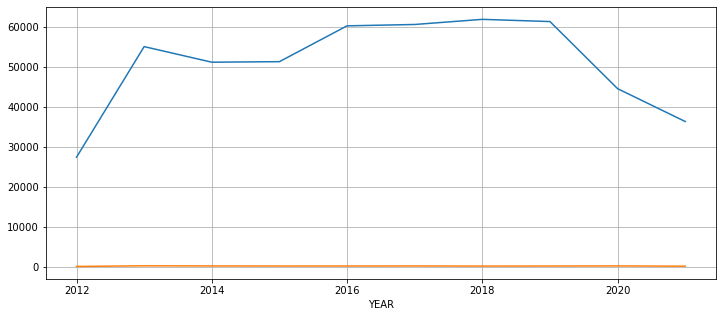

In [71]:
injuries = injuries_deaths.groupby(['YEAR'])['NUMBER OF PERSONS INJURED'].sum().plot(kind='line', figsize=(12, 5), grid=True)
injuries.figure.savefig('img/Injuries_per_Year.png', facecolor='white')
deaths = injuries_deaths.groupby(['YEAR'])['NUMBER OF PERSONS KILLED'].sum().plot(kind='line', figsize=(12, 5), grid=True)
deaths.figure.savefig('img/Deaths_per_Year.png', facecolor='white')

In [ ]:
ped_injuries = injuries_deaths.groupby(['YEAR'])['NUMBER OF PERSONS INJURED'].sum().plot(kind='line', figsize=(12, 5), grid=True)
injuries.figure.savefig('img/Injuries_per_Year.png', facecolor='white')
deaths = injuries_deaths.groupby(['YEAR'])['NUMBER OF PERSONS KILLED'].sum().plot(kind='line', figsize=(12, 5), grid=True)
deaths.figure.savefig('img/Deaths_per_Year.png', facecolor='white')